<a href="https://colab.research.google.com/github/Sushruthan222/Machine-learning-algorithams/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data=pd.read_csv('spotify.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [3]:
data[['top genre']] = data[['top genre']].apply(LabelEncoder().fit_transform)
data[['artist']] = data[['artist']].apply(LabelEncoder().fit_transform)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    int64 
 2   top genre  603 non-null    int64 
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(13), object(1)
memory usage: 66.1+ KB


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
X=data.iloc[:,1:]
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [5]:
pca =PCA(n_components=2) 
X_principal = pca.fit_transform(X_scaled) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']   
X=X_principal
X.head()

,P1,P2
0,-1.523345,-0.892950
1,-1.422242,1.529850
2,-2.135246,0.348132
3,-1.462541,0.973801
4,-0.550303,-0.127200


In [6]:
km=KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
data['km pred']=KMeans(n_clusters=2).fit_predict(X)
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83,0
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82,0
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80,0
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79,0
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78,0


In [7]:
data['km pred']=KMeans(n_clusters=2).fit_predict(X)
data['ms pred']=MeanShift(bandwidth=1).fit_predict(X)
data['db pred']=DBSCAN(eps=1).fit_predict(X)
data['ac pred']=AgglomerativeClustering(n_clusters=2).fit_predict(X)
data.sample(10)

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred,ms pred,db pred,ac pred
263,Sheezus,100,25,2014,130,50,78,-7,11,39,235,15,4,37,1,1,0,0
53,Give Me Everything,141,25,2011,129,94,67,-3,30,53,252,19,16,79,0,0,0,0
502,Remember I Told You,131,25,2017,113,53,68,-6,4,84,202,14,28,53,0,0,0,0
219,Treasure,19,48,2014,116,69,87,-5,32,94,179,4,4,77,0,0,0,0
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),113,25,2019,114,79,60,-6,42,24,217,1,7,69,0,0,0,0
366,Don't Let Me Down,168,33,2016,160,87,53,-5,14,42,208,16,17,81,0,0,0,0
507,A L I E N S,34,47,2017,148,88,43,-5,21,25,282,0,4,41,0,1,0,0
168,Let Me Love You (Until You Learn To Love Yours...,127,25,2013,125,68,66,-7,37,25,252,25,4,70,0,1,0,0
268,Thinking out Loud,46,48,2015,79,45,78,-6,18,59,282,47,3,84,1,9,0,1
403,Runnin' (Lose It All),126,49,2016,139,85,32,-6,48,8,213,1,8,69,0,1,0,0


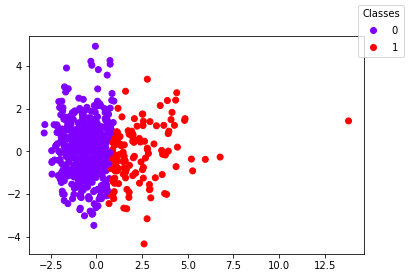

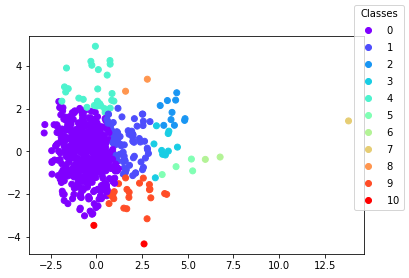

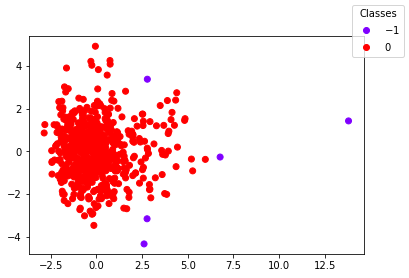

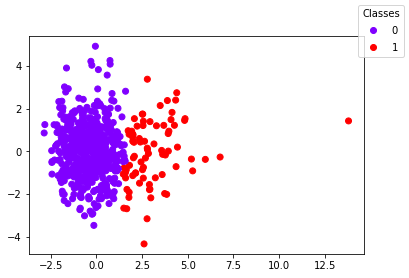

In [8]:
for i in range(-4,0):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X['P1'], X['P2'], c= data.iloc[:,i], cmap ='rainbow')
    legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")


In [9]:
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,km pred,ms pred,db pred,ac pred
0,"Hey, Soul Sister",174,46,2010,97,89,67,-4,8,80,217,19,4,83,0,0,0,0
1,Love The Way You Lie,49,27,2010,87,93,75,-5,52,64,263,24,23,82,0,0,0,0
2,TiK ToK,89,25,2010,120,84,76,-3,29,71,200,10,14,80,0,0,0,0
3,Bad Romance,94,25,2010,119,92,70,-4,8,71,295,0,4,79,0,0,0,0
4,Just the Way You Are,19,48,2010,109,84,64,-5,9,43,221,2,4,78,0,0,0,0


In [10]:
print(silhouette_score(X, data['km pred']), davies_bouldin_score(X, data['km pred']))
print(silhouette_score(X, data['ms pred']), davies_bouldin_score(X, data['ms pred']))
print(silhouette_score(X, data['db pred']), davies_bouldin_score(X, data['db pred']))
print(silhouette_score(X, data['ac pred']), davies_bouldin_score(X, data['ac pred']))


0.41366748561772665 1.0322101555753584
0.2499766869735233 0.8399177588640447
0.6444597069221298 1.0802056415961572
0.47999574213313545 0.8924226004150437


In [11]:
indexlist=[]
indexlistrec=[]
mylist=['Antisocial (with Travis Scott)','Too Good', 'First Time','Thrift Shop (feat. Wanz)', 'Summer', 'Treat You Better', 'Rockabye (feat. Sean Paul & Anne-Marie)']
for index, val in enumerate(data['title']):
    if val in mylist:
        print(val)
        indexlist.append(index)
indexlist  
spotifyrecommendations=['Waiting For Love', 'Burn', 'Uptown Funk', 'Something Just Like This', 'What Do You Mean?', 'Jimmy lovine (feat. Ab-Soul)']
for index, val in enumerate(data['title']):
    if val in spotifyrecommendations:
        print(val)
        indexlistrec.append(index)

Thrift Shop (feat. Wanz)
Summer
Too Good
Treat You Better
Rockabye (feat. Sean Paul & Anne-Marie)
First Time
First Time
Antisocial (with Travis Scott)
Burn
Uptown Funk
What Do You Mean?
Something Just Like This


In [12]:
myspotify=data.iloc[indexlist,-4]
rec=data.iloc[indexlistrec,-4]
rec

228    1
272    0
279    0
455    0
Name: km pred, dtype: int32

In [13]:
for i in range(2,10):
    data['km pred']=KMeans(n_clusters=i).fit_predict(X)
    print(silhouette_score(X, data['km pred']), davies_bouldin_score(X, data['km pred']))

0.41366748561772665 1.0322101555753584
0.34493205771744473 0.9611237712382456
0.31973234472299544 0.9457056304643001
0.3268576350221962 0.9051053583054227
0.3357166785465149 0.8469754417581048
0.3332614199315555 0.7492923642190785
0.32459961955704947 0.795403488900336
0.3271583217956731 0.8049120202320024


In [14]:
for i in range(2,10):
    data['ac pred']=AgglomerativeClustering(n_clusters=i).fit_predict(X)
    print(silhouette_score(X, data['ac pred']), davies_bouldin_score(X, data['ac pred']))

0.47999574213313545 0.8924226004150437
0.3068567536465877 1.0422057102496955
0.25722059499175126 1.0178295503974597
0.2708071839887161 1.0131797787423777
0.2774743580103029 0.9445932859044665
0.30087864895870425 0.9457478113103245
0.3059736164156715 0.8322151122293585
0.2967635939112063 0.7971723840685221


In [15]:
import numpy as np
array=np.arange(0.5,1.2,0.1)
for i in array:
    data['ms pred']=MeanShift(bandwidth=i).fit_predict(X)
    print(silhouette_score(X, data['ms pred']), davies_bouldin_score(X, data['ms pred']))

0.2842615174010281 0.6149970200168244
0.28603165755824445 0.656573577775075
0.24257334963807947 0.7040429967891207
0.19327107820605818 0.7380510534134728
0.18549067834514926 0.9900157478041881
0.2499766869735233 0.8399177588640447
0.26958305500034685 0.7404529793370157


In [16]:
array=np.arange(0.5,1.2,0.1)
for i in array:
    data['db pred']=DBSCAN(eps=i).fit_predict(X)
    print(silhouette_score(X, data['db pred']), davies_bouldin_score(X, data['db pred']))

0.4209351119487701 2.4440868953484514
0.4552127684553473 3.1485316130717806
0.39819688685144666 2.2910550120676416
0.42244130565662197 1.1231285908585806
0.6114245959135003 1.0443468948586667
0.6444597069221298 1.0802056415961572
0.6730842126691065 0.9709126650090179
